#**Aprendizaje Automático** - 2023
# Clase 6: Árboles de Decisión (CARTs)

*Trabajaron en esta notebook: Sofia Del Pozo, Diego Onna, Gaston Bujia*

## Contenidos

* Árboles de clasificación
* Árboles de regresión
* Desbalance de clases

# Arboles de Decisión: La forma fácil

Scikit-Learn nos provee el módulo [Tree](https://scikit-learn.org/stable/modules/tree.html) en el cuál encontraremos los CARTs: *Classification And Regression Trees*. En esta notebook veremos como ajustar un árbol de decisión para [clasificación](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), sus hiperparámetros y las regiones de decisión.

## Dataset

Para probar los árboles usaremos dos datasets que crearemos: [moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) y [circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html). También utilizaremos [blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) que nos permite generar distribuciones Gaussianas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.dummy import DummyClassifier

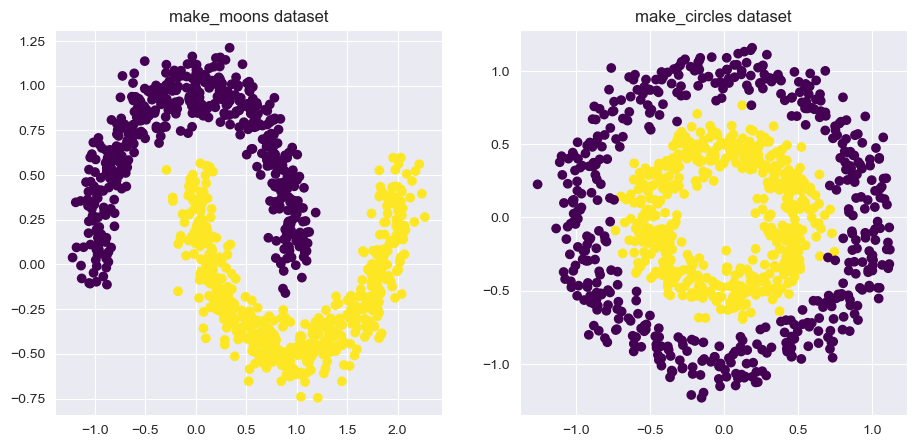

In [2]:
# Crear dataset con make_moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Crear dataset con make_circles
X_circles, y_circles = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Visualizar ambos datasets
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 5))

ax1.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis')
ax1.set_title('make_moons dataset')

ax2.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='viridis')
ax2.set_title('make_circles dataset')

plt.show()

Separamos los datos en conjuntos de entrenamiento y testeo

In [51]:
# Separar los datos en train y test para make_moons
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)

# Separar los datos en train y test para make_circles
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, test_size=0.3, random_state=42)

NameError: name 'X_circles' is not defined

## Profundidad de los árboles

Dados estos dos datasets, probaremos en ambos dos árboles diferentes, uno con una profundidad pequeña: `max_depth=2` y otro con una profundidad mayor `max_depth=10`. El objetivo es entender cómo se comportar para una tarea de clasificación y ver las limitaciones.

Los CARTs, como casi todo modelo en scikit-learn, se los utiliza de la misma manera:
1.  Se instancia un modelo, pasándole sus parámetros.
2.  Se ajusta/entrena el modelo mediante el método fit, el cual recibe los datos de entrada y el target
3.  Se predice sobre nuevos datos utilizando el método predict
4.  Se evalua la performance utilizando metricas en el modulo sklearn.metric

In [4]:
# Instanciar árbol de clasificación profundo para make_moons
tree_deep_moons = DecisionTreeClassifier(max_depth=10, random_state=42)

# Instanciar árbol de clasificación no tan profundo para make_moons
tree_shallow_moons = DecisionTreeClassifier(max_depth=2, random_state=42)

In [5]:

# Fit de los árboles en make_moons
tree_deep_moons.fit(X_train_moons, y_train_moons)
tree_shallow_moons.fit(X_train_moons, y_train_moons)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [6]:
# Instanciar árbol de clasificación profundo para make_circles
tree_deep_circles = DecisionTreeClassifier(max_depth=10, random_state=42)

# Instanciar árbol de clasificación no tan profundo para make_circles
tree_shallow_circles = DecisionTreeClassifier(max_depth=2, random_state=42)

In [7]:

# Fit de los árboles en make_circles
tree_deep_circles.fit(X_train_circles, y_train_circles)
tree_shallow_circles.fit(X_train_circles, y_train_circles)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Evaluación

In [8]:
# Predicciones en make_moons
y_pred_deep_moons = tree_deep_moons.predict(X_test_moons)
y_pred_shallow_moons = tree_shallow_moons.predict(X_test_moons)

# Accuracy en make_moons
acc_deep_moons = accuracy_score(y_test_moons, y_pred_deep_moons)
acc_shallow_moons = accuracy_score(y_test_moons, y_pred_shallow_moons)

# Predicciones en make_circles
y_pred_deep_circles = tree_deep_circles.predict(X_test_circles)
y_pred_shallow_circles = tree_shallow_circles.predict(X_test_circles)

# Accuracy en make_circles
acc_deep_circles = accuracy_score(y_test_circles, y_pred_deep_circles)
acc_shallow_circles = accuracy_score(y_test_circles, y_pred_shallow_circles)

print(f"Accuracy con árbol profundo en make_moons: {acc_deep_moons}")
print(f"Accuracy con árbol profundo en make_circles: {acc_deep_circles}")
print(f"Accuracy con árbol no tan profundo en make_moons: {acc_shallow_moons}")
print(f"Accuracy con árbol no tan profundo en make_circles: {acc_shallow_circles}")


Accuracy con árbol profundo en make_moons: 1.0
Accuracy con árbol profundo en make_circles: 0.9633333333333334
Accuracy con árbol no tan profundo en make_moons: 0.9233333333333333
Accuracy con árbol no tan profundo en make_circles: 0.7066666666666667


 ## Visualización

### Frontera de decisión

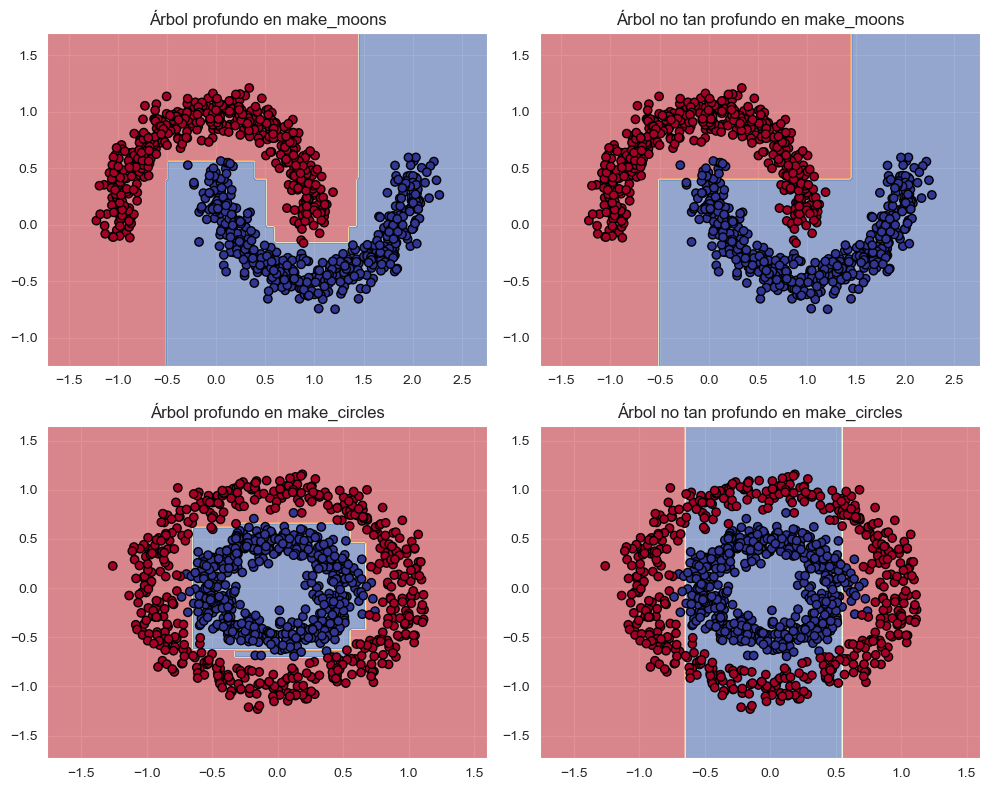

In [9]:
# Nos armamos una función auxiliar para graficar las regiones de decisión de un clasificador
def plot_decision_regions(X, y, classifier, ax):
    # Configurar grilla
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir clases para cada punto en la grilla
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar regiones de decisión y puntos de entrenamiento
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')

# Graficar regiones de decisión de ambos árboles en ambos datasets
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axs[0, 0].set_title("Árbol profundo en make_moons")
plot_decision_regions(X_moons, y_moons, tree_deep_moons, axs[0, 0])
axs[0, 1].set_title("Árbol no tan profundo en make_moons")
plot_decision_regions(X_moons, y_moons, tree_shallow_moons, axs[0, 1])
axs[1, 0].set_title("Árbol profundo en make_circles")
plot_decision_regions(X_circles, y_circles, tree_deep_circles, axs[1, 0])
axs[1, 1].set_title("Árbol no tan profundo en make_circles")
plot_decision_regions(X_circles, y_circles, tree_shallow_circles, axs[1, 1])
plt.tight_layout()
plt.show()

### Cosas a tener en cuenta

* Las fronteras de decisión son ortogonales (solo puede dividir con rectas a 90° entre si).
* Un árbol lo suficientemente profundo podría aproximar *cualquier función matemática* (de las normalitas)
* Modelo más complejo != Modelo que mejor generaliza
* Trabajamos en 2D para poder visualizar las cosas, pero en la práctica, el número de dimensiones, que equivale al número de atributos usados, es mucho mayor a lo que podemos observar.

![alt text](https://pbs.twimg.com/media/Dtq79-1X4AA7lJW.jpg)

(Si no saben quien es [Geoffrey Hinton](https://en.wikipedia.org/wiki/Geoffrey_Hinton), deberían ya que lo llaman [el padrino del Deep Learning](https://www.youtube.com/watch?v=-eyhCTvrEtE&ab_channel=PreserveKnowledge))

### Decisiones del árbol

Podemos tratar de visualizar el árbol y las consiguientes decisiones usando la función [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree) de sklearn ([documentación extra](https://scikit-learn.org/stable/modules/tree.html#classification)).

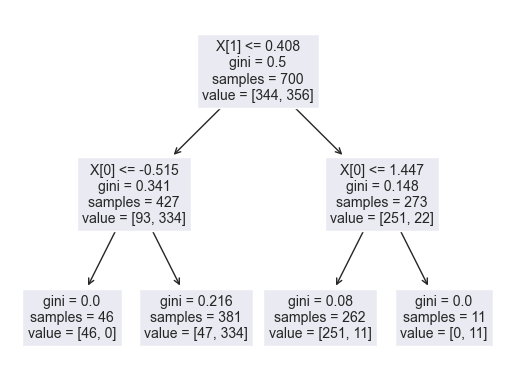

In [10]:
from sklearn.tree import plot_tree
plot_tree(tree_shallow_moons);

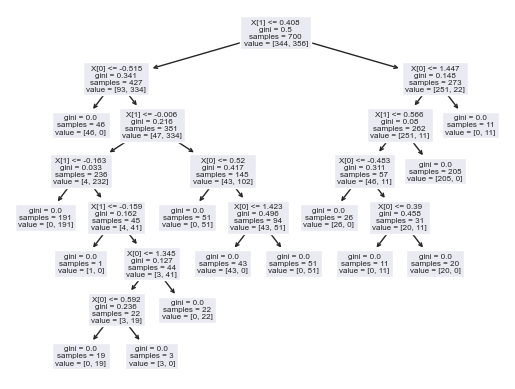

In [11]:
plot_tree(tree_deep_moons);

¿Por qué no es un árbol simétrico como en el anterior caso? (Tip: Analizar cada hoja!)

También podemos utilizar algunas librerias auxiliares para visualizar el modelo e incluso exportarlo usando [export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz). ¿Identifican que nodos son las hojas(nodos terminales que no se dividen)? ¿Qué información les brinda cada nodo?

In [38]:
from six import StringIO
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


ModuleNotFoundError: No module named 'pydot'

In [37]:

dot_data = StringIO()
tree.export_graphviz(tree_deep_moons,
                out_file=dot_data,
                filled=True,
                rounded=True)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

## Ejercicio 

1. Para este ejercicio deberan instanciar un nuevo dataset de `make_moons` con 1000 puntos y `noise=0.2`. Realizar una división de datos en `train` y `test`.

In [44]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.tree import DecisionTreeClassifier#, DecisionTreeRegressor
from sklearn.metrics import accuracy_score#, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.tree import plot_tree

#from sklearn.dummy import DummyClassifier

# Crear dataset con make_moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_moons, y_moons, random_state=123, stratify=y_moons)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=123, stratify=y_train_val)


2. Instanciar y entrenar 20 arboles diferentes usando los mismos hiperparametros pero con profundidad de 1 a 20.

In [23]:
lista=[]
for max_depth in range(1,11):
    tree_deep_moons = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree_deep_moons.fit(X_train, y_train)

    y_pred = tree_deep_moons.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)

    print(f"el modelo de profundidad {max_depth} tiene un accuracy de {accuracy}")

    dict={"max_depth": max_depth,
          "score": accuracy
          }

    lista.append(dict)

depth_acc = pd.DataFrame(lista)
display(depth_acc)

el modelo de profundidad 1 tiene un accuracy de 0.8138297872340425
el modelo de profundidad 2 tiene un accuracy de 0.8882978723404256
el modelo de profundidad 3 tiene un accuracy de 0.8882978723404256
el modelo de profundidad 4 tiene un accuracy de 0.8882978723404256
el modelo de profundidad 5 tiene un accuracy de 0.9574468085106383
el modelo de profundidad 6 tiene un accuracy de 0.9574468085106383
el modelo de profundidad 7 tiene un accuracy de 0.9627659574468085
el modelo de profundidad 8 tiene un accuracy de 0.9521276595744681
el modelo de profundidad 9 tiene un accuracy de 0.9361702127659575
el modelo de profundidad 10 tiene un accuracy de 0.9361702127659575


,max_depth,score
0,1,0.813830
1,2,0.888298
2,3,0.888298
3,4,0.888298
4,5,0.957447
5,6,0.957447
6,7,0.962766
7,8,0.952128
8,9,0.936170
9,10,0.936170



3. Graficar el accuracy de estos arboles en ambos conjuntos con la profundidad en el eje `x` y accuracy en el eje `y`. ¿A partir de que punto dirían que el arbol esta sobreajustando?

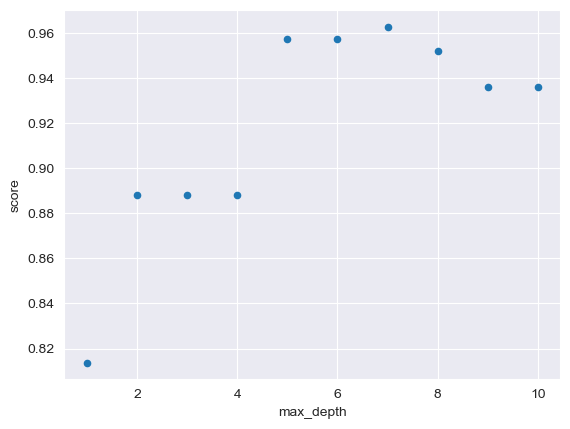

In [24]:
depth_acc.plot.scatter(x="max_depth", y="score");


4. Grafique el mejor árbol encontrado.

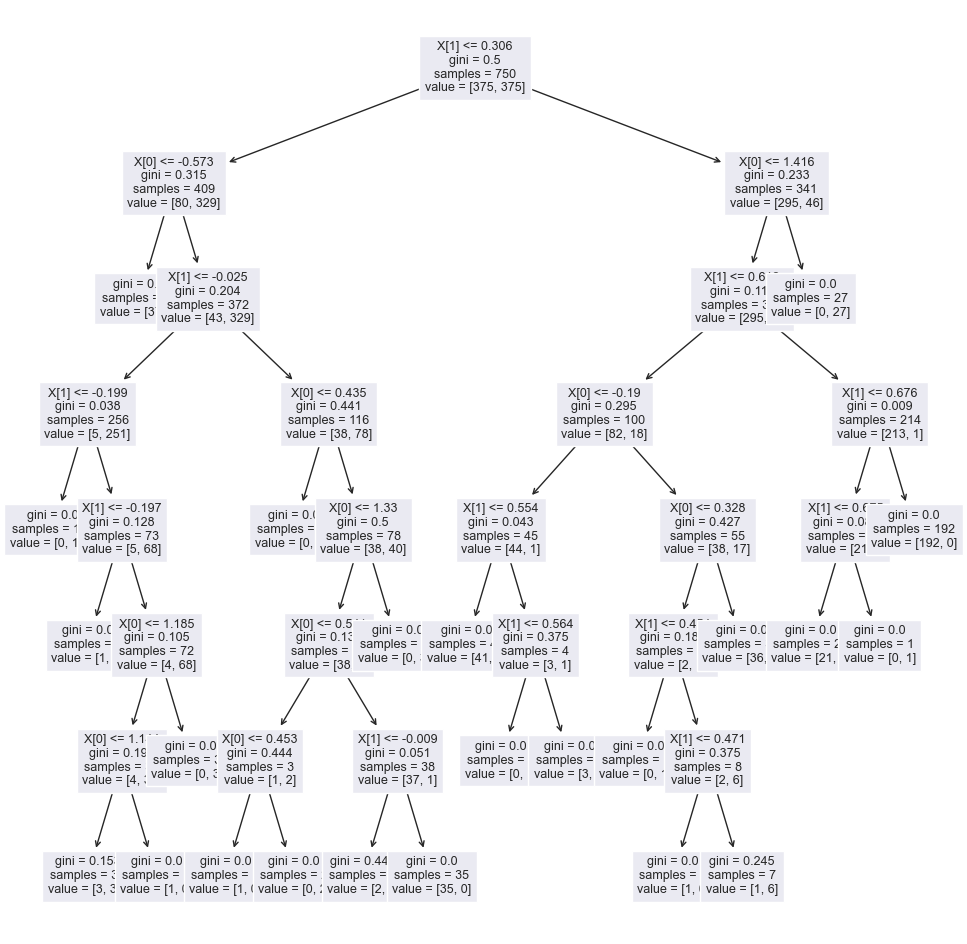

In [48]:
#reentreno con todos X_train
depth_acc_max=depth_acc.loc[depth_acc.score == depth_acc.score.max(), "max_depth"].values[0]

best_tree = DecisionTreeClassifier(max_depth=depth_acc_max, random_state=42)
best_tree.fit(X_train_val, y_train_val)

plt.figure(figsize=(12,12))
plot_tree(best_tree, fontsize=9)
plt.show()


In [49]:
best_tree.feature_importances_


array([0.46863103, 0.53136897])

## Hiperparámetros - Random Search

Los árboles cuentan con muchos hiperparámetros para elegir, lo cuál los hace muy versátiles pero tienen una gran tendencia a *overfitear* los datos. Muchos de estos hiperparámetros tienen como objetivo controlar la complejidad del modelo y evitar asi el overfitting. Algunos de los más importantes implementados en scikit-learn son los siguientes:

1. `criterion`: la función de calidad utilizada para evaluar la calidad de una división. Las opciones son "gini" para la impureza de Gini y "entropy" para la ganancia de información.

2. `max_depth`: la profundidad máxima del árbol. Este hiperparámetro controla la complejidad del modelo y puede evitar el sobreajuste.

3. `min_samples_split`: el número mínimo de muestras requeridas para dividir un nodo interno. Si el número de muestras en un nodo es menor que este valor, no se realizará la división.

4. `min_samples_leaf`: el número mínimo de muestras requeridas para ser una hoja. Si la cantidad de muestras en un nodo es menor que este valor después de la división, el nodo será considerado una hoja.

5. `max_features`: el número máximo de características a considerar al buscar la mejor división. Si es None, se consideran todas las características.

6. `ccp_alpha`: un parámetro de complejidad efectiva que penaliza árboles con muchas ramas. Este parámetro controla la cantidad de poda que se realiza en el árbol. Un valor más alto de ccp_alpha aumenta la cantidad de poda y puede reducir el sobreajuste.

Una mención extra para el `class_weight` que lo verán en la parte de desbalance.

Dado que son muchos hiperparamentros es necesario un método para optimizar la búsqueda de la combinación optima. Una forma es utilizando [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) que es un método de búsqueda de hiperparámetros que en lugar de probar todas las posibles combinaciones, este método elige aleatoriamente un subconjunto de combinaciones para evaluar, lo que lo hace más eficiente en términos de tiempo y recursos.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, expon

# Definir el modelo de árbol de decisión
modelo_a_optimizar = DecisionTreeClassifier()

# Definir el espacio de búsqueda de los hiperparámetros
param_dist = {'criterion': ["gini", "entropy"],
              'max_depth': [3, 5, 7, 10, None],
              'max_features': randint(1, 4),
              'min_samples_split': randint(2, 11),
              'min_samples_leaf': randint(1, 11),
              'ccp_alpha': expon(scale=0.1)}

# Definir la métrica de evaluación
metric = 'accuracy'

# Definir el objeto de búsqueda aleatoria
search = RandomizedSearchCV(modelo_a_optimizar, param_distributions=param_dist, n_iter=100, cv=5, scoring=metric)

# Entrenar el modelo con la búsqueda aleatoria de hiperparámetros
search.fit(X_train_moons, y_train_moons)

# Obtener los hiperparámetros óptimos
print("Mejores hiperparámetros:", search.best_params_)

# Evaluar el modelo con los hiperparámetros óptimos en el conjunto de prueba
accuracy = search.score(X_test_moons, y_test_moons)
print("Precisión del modelo:", accuracy)

**Ejercicio** - Haga una búsqueda de hiperparámetros para el conjunto de círculos. Explore los hiperparámetros mencionados.

In [65]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import matplotlib as plt


X_circles, y_circles = make_circles(n_samples=1000, noise=0.2, factor=0.5, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, test_size=0.3, stratify=y_circles)



In [62]:
model = DecisionTreeClassifier()

params = {"criterion": ["gini", "entropy"],
          "splitter": ["best", "random"],
          "max_depth": [1,5,10,15],
          "min_samples_split": [5,10,20],
          "min_samples_leaf": [5,10,20],
          }

model_cv= RandomizedSearchCV(estimator= model, param_distributions= params, n_iter=100, cv=5, scoring= "roc_auc")

model_cv.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 15],
                                        'min_samples_leaf': [5, 10, 20],
                                        'min_samples_split': [5, 10, 20],
                                        'splitter': ['best', 'random']},
                   scoring='roc_auc')

{'splitter': 'best', 'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': 15, 'criterion': 'gini'}


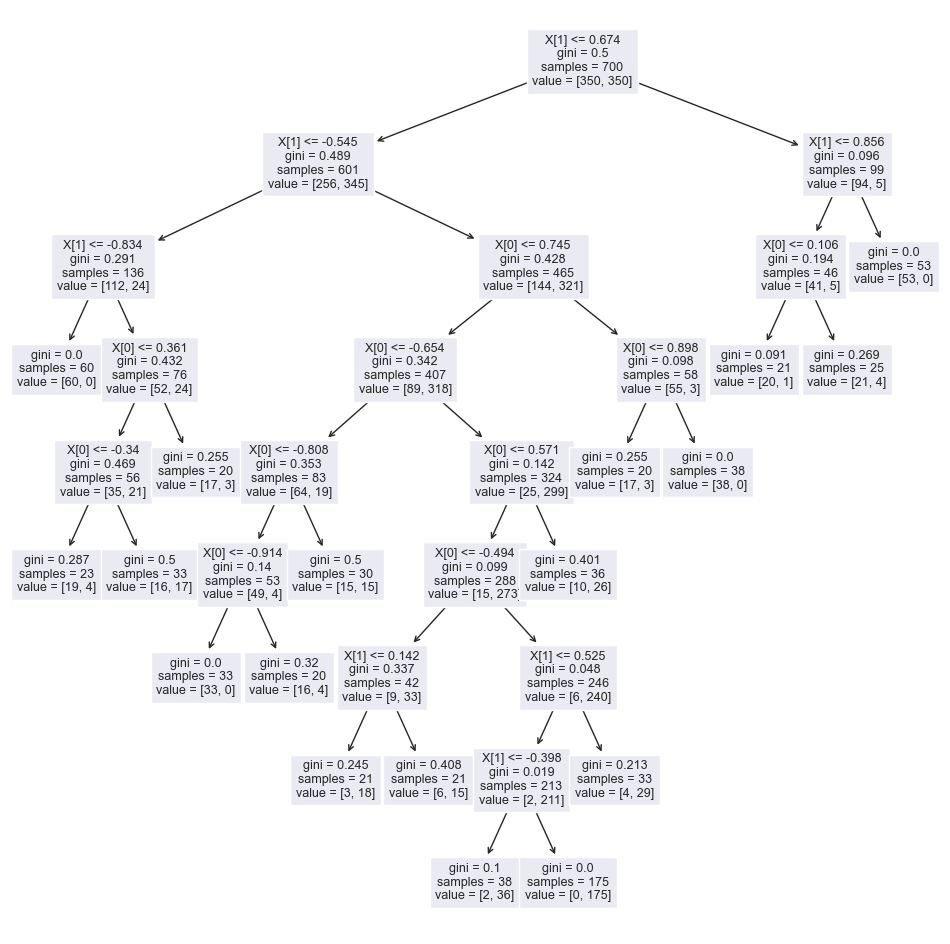

In [74]:
print(model_cv.best_params_)

best_model = DecisionTreeClassifier()
best_model.set_params(**model_cv.best_params_)
best_model.fit(X_train, y_train)

plt.figure(figsize=(12,12))
plot_tree(best_model, fontsize=9)
plt.show()

In [75]:
y_pred= best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8333333333333334


## Arboles de regresión

Scikit-Learn también tiene implementados [árboles de regresión](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). El árbol de regresión `DecisionTreeRegressor` es una variante del árbol de decisión que se utiliza para problemas de regresión en lugar de clasificación. En lugar de clasificar las muestras en diferentes categorías, el árbol de regresión realiza una predicción numérica del valor de salida para cada muestra.

Al igual que con el árbol de decisión para clasificación, los hiperparámetros del árbol de regresión, como `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`, `criterion`, `ccp_alpha`, entre otros, pueden ser ajustados para controlar la complejidad del modelo y evitar el sobreajuste.

# Desbalance de clases

El desbalance de clases en la clasificación es un problema común que puede afectar significativamente el rendimiento del modelo. Ocurre cuando la proporción de ejemplos en una clase es mucho menor que en las otras, lo que puede hacer que el modelo esté sesgado hacia la clase mayoritaria y tenga dificultades para reconocer la clase minoritaria. Como resultado, la precisión de la predicción en la clase minoritaria puede ser baja, lo que puede ser problemático en aplicaciones donde la identificación de la clase minoritaria es crucial. Trabajemos un poco con el tema.

Primero creemos un data set que sea desbalanceado.

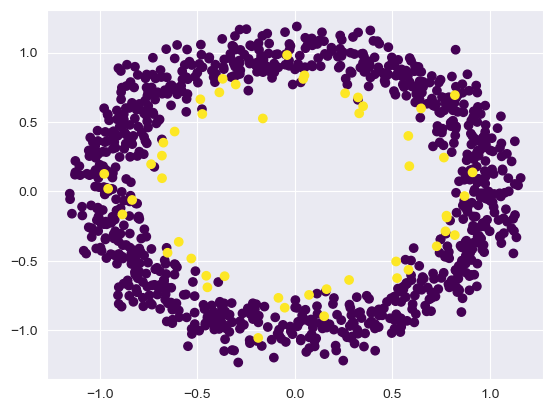

In [76]:
X_desbal, y_desbal = make_circles(n_samples=[950, 50], noise=0.1, shuffle=False, random_state=42)
plt.scatter(X_desbal[:, 0], X_desbal[:, 1], c=y_desbal, cmap='viridis')
plt.show()

## Ejemplo 1

In [77]:
X_train_desbal, X_test_desbal, y_train_desbal, y_test_desbal = train_test_split(X_desbal,y_desbal, shuffle=False)
X_train_desbal.shape, X_test_desbal.shape

((750, 2), (250, 2))

In [78]:
model = DecisionTreeClassifier(max_depth=10, random_state=42)

# Entrenamos
model.fit(X_train_desbal, y_train_desbal)

print(f"Accuracy en train: {accuracy_score(y_train_desbal, model.predict(X_train_desbal))}")
print(f"Accuracy en test: {accuracy_score(y_test_desbal, model.predict(X_test_desbal))}")

Accuracy en train: 1.0
Accuracy en test: 0.8


¿Qué les parece que sucede con las metricas de accuracy? *Hint:* Observen que sucede con los tamaños de train y test.

In [79]:
# Para ayudar a responder esa pregunta podemos graficar el modelo y sus fronteras de decisión
#fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
#plot_decision_regions(X_train_desbal, y_train_desbal, model, axs)

<AxesSubplot:>

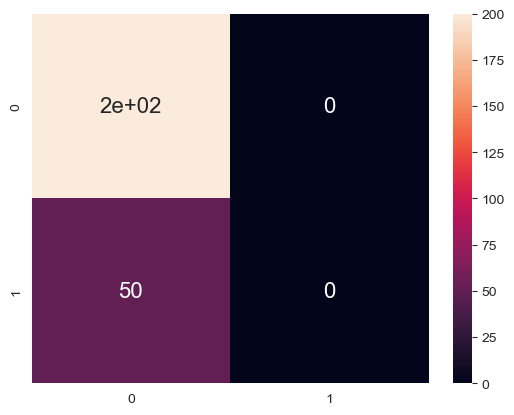

In [83]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test_desbal,model.predict(X_test_desbal)), annot=True, annot_kws={"size": 16})

Un opción para atacar este problema es utilizar los hiperparámetros de *shuffle* y *stratify* de [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [ ]:
# Repetir el split utilizando en el split shuffle y stratify y generar un nuevo modelo
# COMPLETAR

## Ejemplo 2

¿Qué pasa con el accuracy cuando hay desbalance? Vamos a comparar un árbol de decisión con un [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) para entender cómo el desbalance puede afectar la clasificación.

In [85]:
from sklearn.dummy import DummyClassifier
X_train, X_test, y_train, y_test = train_test_split(X_desbal,y_desbal, stratify=y_desbal)

mi_arbolito = DecisionTreeClassifier(max_depth=5, random_state=42)
mi_otro_modelito = DummyClassifier(strategy='most_frequent')

# Entrenamos ambos modelos
mi_arbolito.fit(X_train, y_train)
mi_otro_modelito.fit(X_train, y_train)

print(f"Accuracy en test del arbol: {accuracy_score(y_test, mi_arbolito.predict(X_test))}")
print(f"Accuracy en test del otro modelito: {accuracy_score(y_test, mi_otro_modelito.predict(X_test))}")

Accuracy en test del arbol: 0.948
Accuracy en test del otro modelito: 0.952


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mi_arbolito.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       238
           1       0.00      0.00      0.00        12

    accuracy                           0.95       250
   macro avg       0.48      0.50      0.49       250
weighted avg       0.91      0.95      0.93       250



<AxesSubplot:>

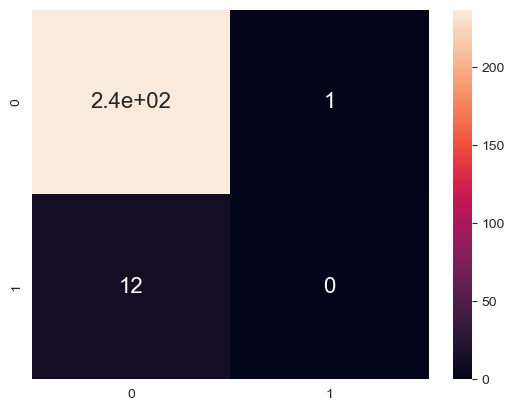

In [88]:
sns.heatmap(confusion_matrix(y_test,mi_arbolito.predict(X_test)), annot=True, annot_kws={"size": 16})

In [89]:
print(classification_report(y_test, mi_otro_modelito.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       238
           1       0.00      0.00      0.00        12

    accuracy                           0.95       250
   macro avg       0.48      0.50      0.49       250
weighted avg       0.91      0.95      0.93       250



C:\Users\igalk\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\igalk\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\igalk\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

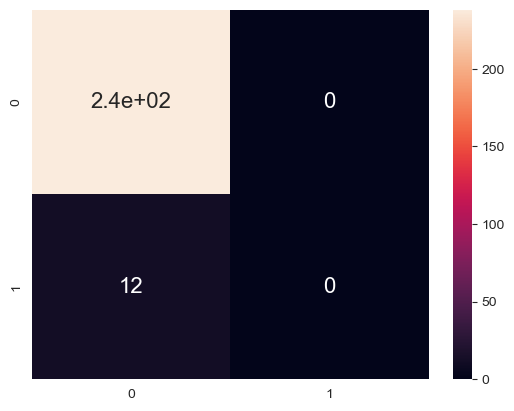

In [90]:
sns.heatmap(confusion_matrix(y_test,mi_otro_modelito.predict(X_test)), annot=True, annot_kws={"size": 16})

Ĺos árboles de decisión nos permiten tener en cuenta el desbalance a partir de darle a cada instancia un peso relativo a su distribución, es decir, clasificar bien una clase más infrecuente pesa más que una clase muy frecuente. Para eso existe el hiperparámetro `class_weight`.

In [91]:
mi_arbolito_balanceado = DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42)

mi_arbolito_balanceado.fit(X_train, y_train)

print(f"Accuracy en test del arbol sin balancear: {accuracy_score(y_test, mi_arbolito.predict(X_test))}")
print(f"Accuracy en test del arbol balanceado: {accuracy_score(y_test, mi_arbolito_balanceado.predict(X_test))}")

Accuracy en test del arbol sin balancear: 0.948
Accuracy en test del arbol balanceado: 0.792


Ahora el árbol balanceado consideró que cada clasificar bien cada muestra no es lo mismo, entonces nos devuelve una métrica más realista que es el *balanced accuracy*: [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html).

In [92]:
from sklearn.metrics import balanced_accuracy_score
print(f"Accuracy en test del arbol sin balancear: {balanced_accuracy_score(y_test, mi_arbolito.predict(X_test))}")
print(f"Accuracy en test del arbol balanceado: {balanced_accuracy_score(y_test, mi_arbolito_balanceado.predict(X_test))}")

Accuracy en test del arbol sin balancear: 0.49789915966386555
Accuracy en test del arbol balanceado: 0.7324929971988796
